In [2]:
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


plt.style.use('seaborn')

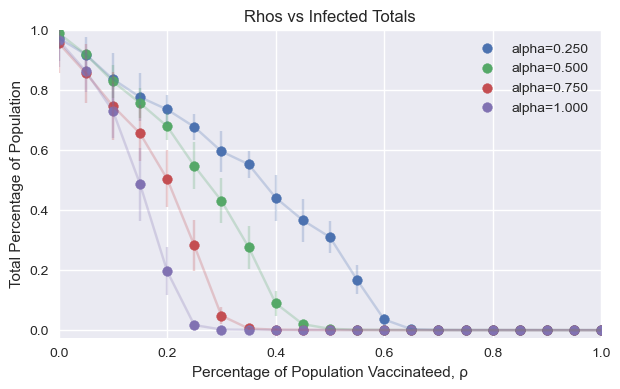

In [16]:
def plot_mixed_totals(run_folder: str, state: str):
    run_folder_path = os.path.join(os.path.abspath('../'), 'records', run_folder)
    
    plt.figure(figsize=(7, 4))
    
    for alpha_folder in os.listdir(run_folder_path):
        alpha = float(re.match(r'alpha=(\d\.\d+)', alpha_folder).groups()[0])
        
        alpha_folder_path = os.path.join(run_folder_path, alpha_folder)
        
        alpha_totals = []
        alpha_errs = []
        
        for rho_folder in os.listdir(alpha_folder_path):
            rho = float(re.match(r'rho=(\d\.\d+)', rho_folder).groups()[0])
            
            rho_folder_path = os.path.join(alpha_folder_path, rho_folder)
        
            totals_df = pd.read_csv(os.path.join(rho_folder_path, 'totals.csv'))
            
            alpha_totals.append((rho, totals_df.iloc[-1][state]))
            alpha_errs.append((rho, totals_df.iloc[-1][state + '_STD']))
            
        alpha_totals.sort()
        alpha_errs.sort()
        
        X = [t[0] for t in alpha_totals]
        y = [t[1] for t in alpha_totals]
        yerr = [t[1] for t in alpha_errs]
        plt.scatter(X, y, label=alpha_folder)
        plt.errorbar(X, y, yerr=yerr, alpha=0.25)
        
    plt.xlim(0, 1)
    plt.ylim(-0.025, 1)
    plt.title(f'Rhos vs {state} Totals')
    plt.xlabel('Percentage of Population Vaccinateed, ρ')
    plt.ylabel('Total Percentage of Population')
    
    plt.legend()
    plt.show()
    
plot_mixed_totals('mixed', 'Infected')

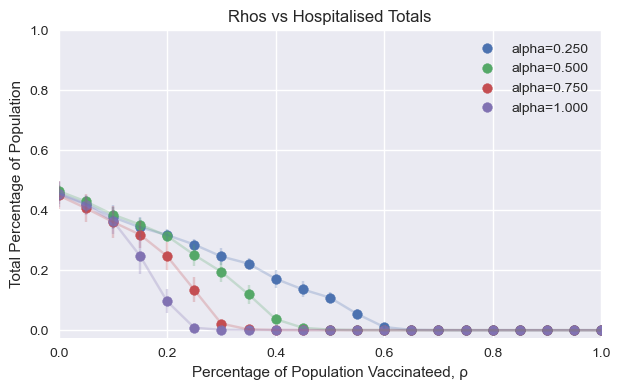

In [17]:
plot_mixed_totals('mixed', 'Hospitalised')

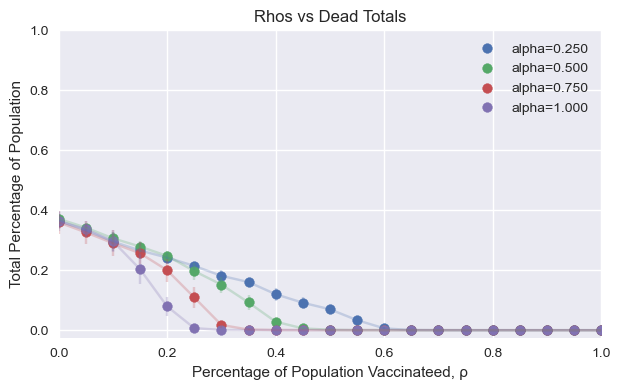

In [18]:
plot_mixed_totals('mixed', 'Dead')